In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import arviz as az
import pymc as pm
from pathlib import Path
from peak_performance import pipeline as pl, models, plots
from matplotlib import pyplot as plt

# Load and inspect raw intensity data

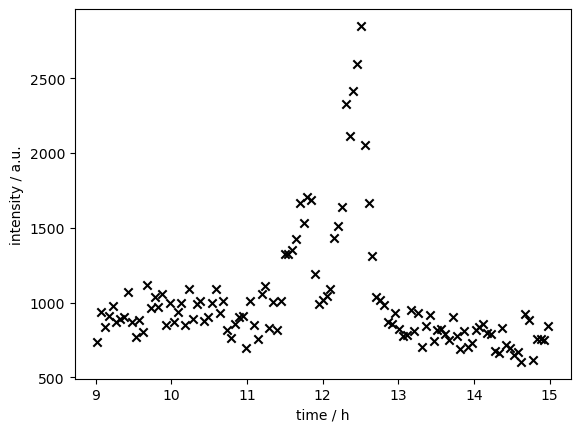

In [2]:
timeseries = np.load(Path(r"..\example\A2t2R1Part1_132_85.9_86.1.npy"))

fig, ax = plt.subplots()
ax.scatter(timeseries[0], timeseries[1], marker="x", color="black")
ax.set(
    xlabel="time / h",
    ylabel="intensity / a.u.",
)
plt.show()

# Define a peak model

c:\Users\osthege\AppData\Local\mambaforge\envs\pepe\Lib\site-packages\pymc\data.py:273: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


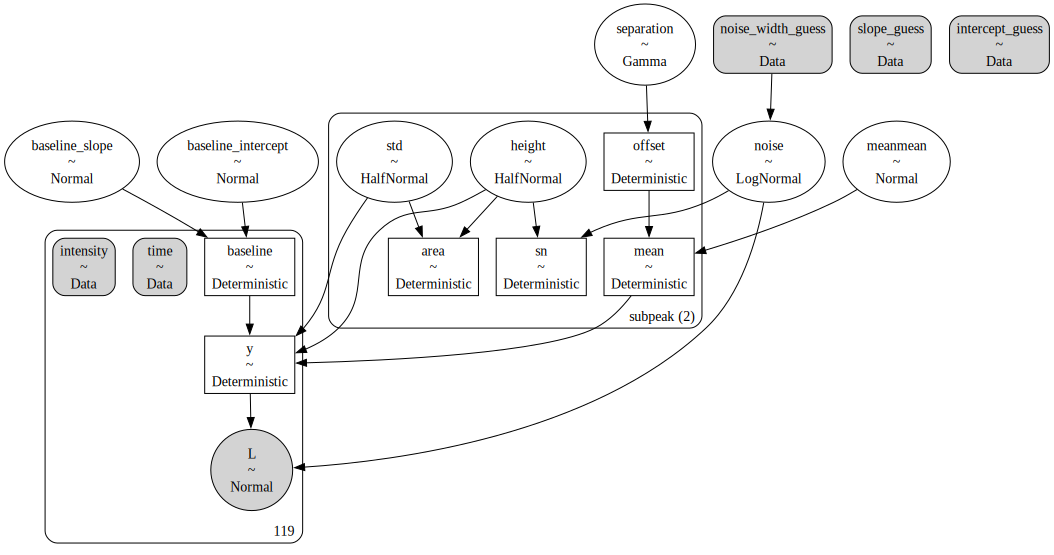

In [3]:
pmodel = models.define_model_double_normal(
    time=timeseries[0],
    intensity=timeseries[1]
)
pmodel.to_graphviz()

# Inspect priors for separation and retention time

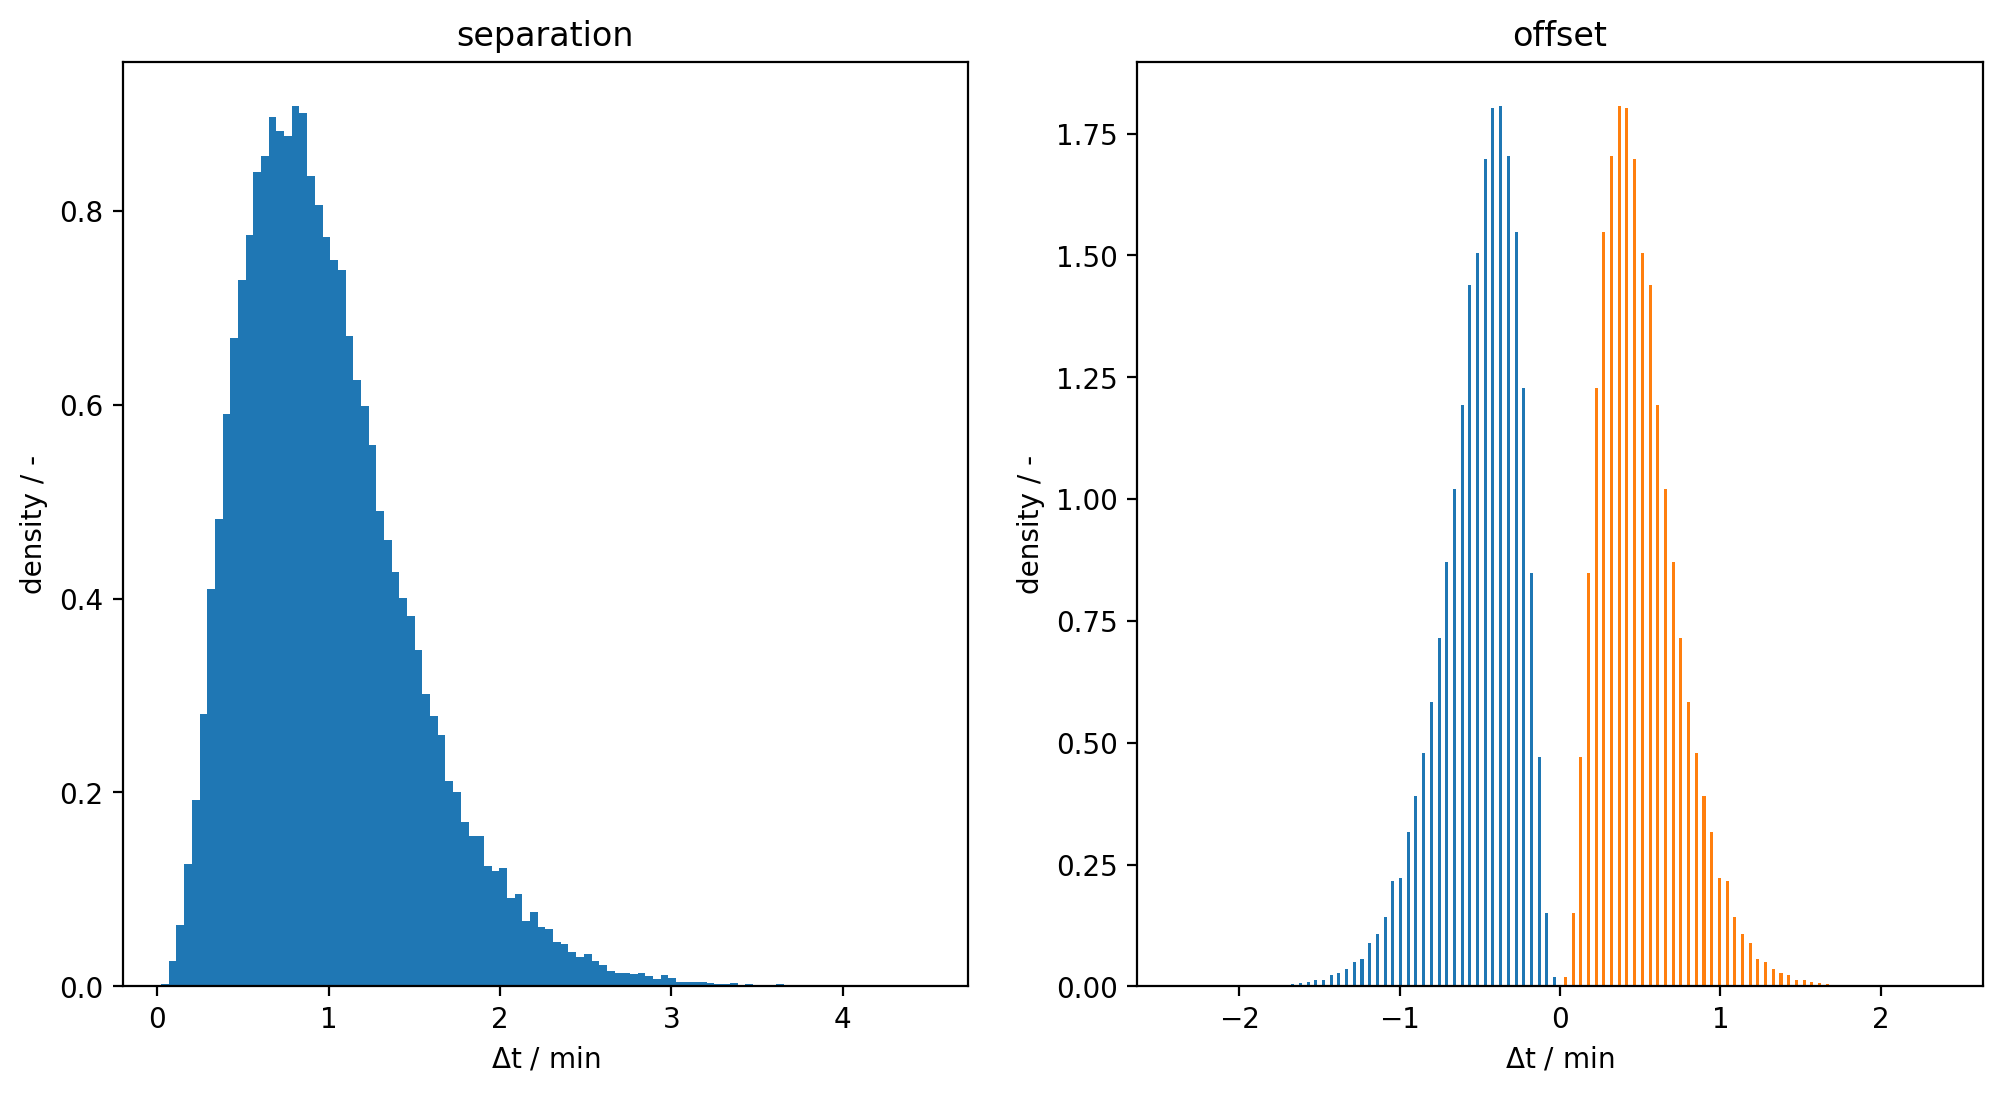

In [4]:
fig, axs = plt.subplots(dpi=200, ncols=2, figsize=(12, 6))
ax = axs[0]
ax.hist(pm.draw(pmodel["separation"], draws=50000), bins=100, density=True)
ax.set(ylabel="density / -", xlabel="$\mathrm{\Delta t\ /\ min}$", title="separation")

ax = axs[1]
ax.hist(pm.draw(pmodel["offset"], draws=50000), bins=100, density=True)
ax.set(ylabel="density / -", xlabel="$\mathrm{\Delta t\ /\ min}$", title="offset")
plt.show()

# Run MCMC sampling and inspect results

In [5]:
idata = pl.sampling(pmodel, tune=6_000, draws=2000)
idata = pl.posterior_predictive_sampling(pmodel, idata)
idata

Sampling: [L, baseline_intercept, baseline_slope, height, meanmean, noise, separation, std]


Sampling: [L]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

Warmup iterations saved (warmup_*).

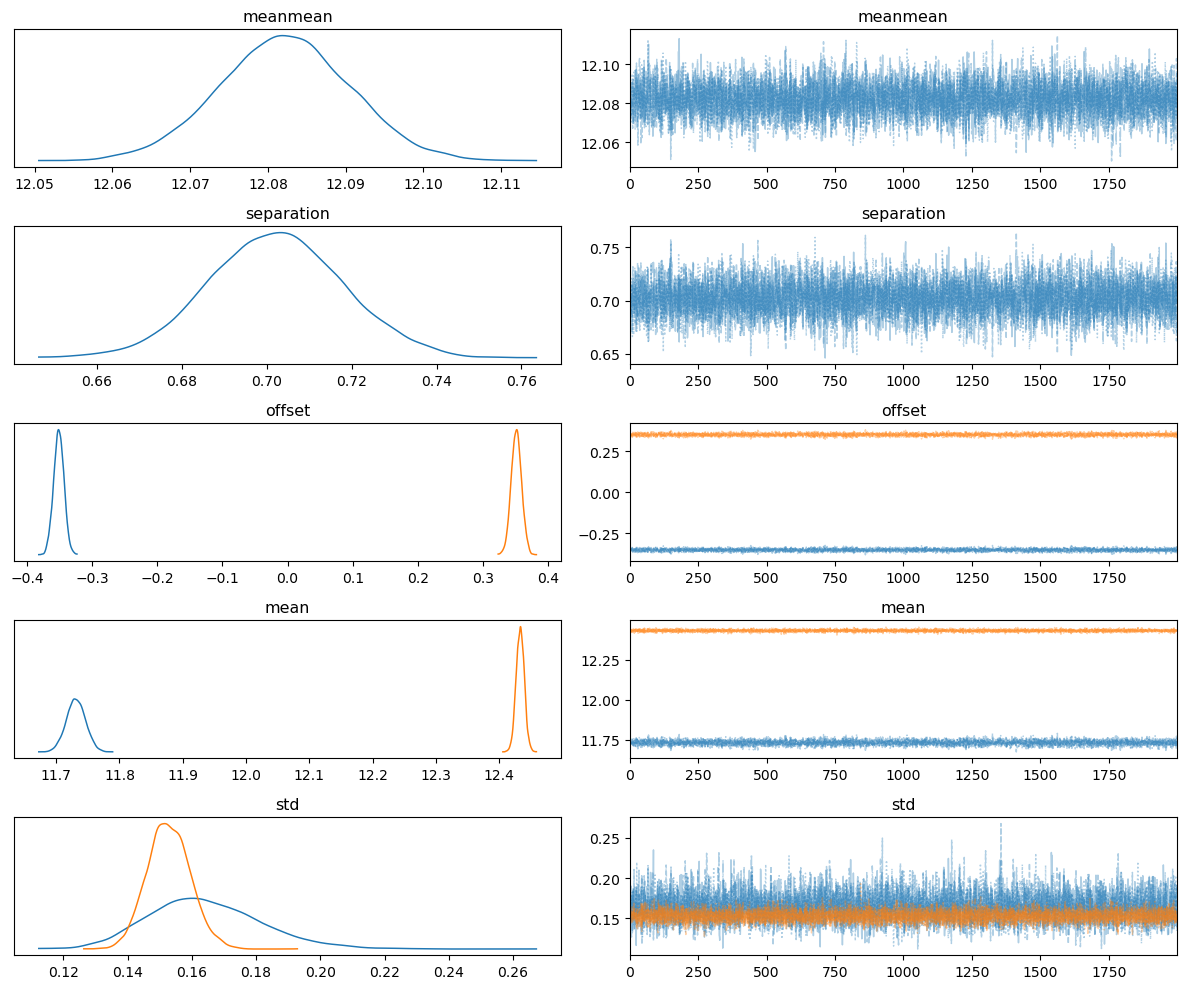

In [6]:
az.plot_trace(idata, var_names=["meanmean", "separation", "offset", "mean", "std"], combined=True)
plt.tight_layout()
plt.show()

In [7]:
summary = az.summary(idata, var_names=["~y", "~baseline", "offset"])
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
area[0],316.879,28.606,260.096,368.756,0.267,0.189,11447.0,5609.0,1.0
area[1],674.658,26.019,628.417,725.552,0.247,0.175,11094.0,6189.0,1.0
baseline_intercept,1115.569,39.801,1041.960,1192.575,0.752,0.533,2805.0,3543.0,1.0
baseline_slope,-21.651,3.153,-27.610,-15.693,0.060,0.042,2801.0,3638.0,1.0
height[0],774.967,64.153,658.831,899.934,0.748,0.529,7341.0,6375.0,1.0
height[1],1762.363,64.785,1639.151,1884.930,0.731,0.517,7857.0,6440.0,1.0
height_log__[0],6.649,0.083,6.491,6.803,0.001,0.001,7341.0,6375.0,1.0
height_log__[1],7.474,0.037,7.407,7.546,0.000,0.000,7857.0,6440.0,1.0
mean[0],11.731,0.015,11.703,11.760,0.000,0.000,5173.0,5319.0,1.0
mean[1],12.433,0.007,12.422,12.446,0.000,0.000,12180.0,6652.0,1.0


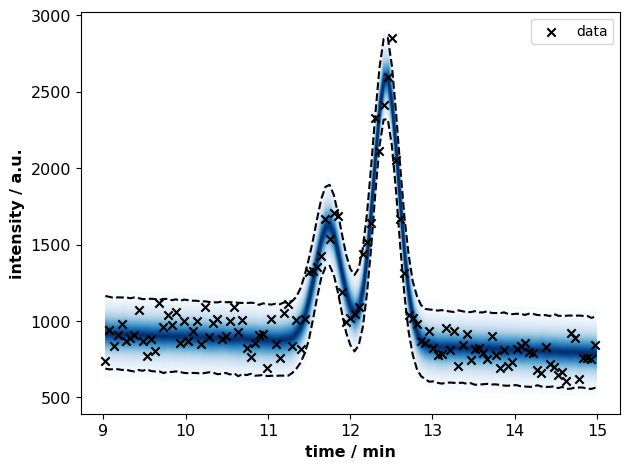

In [8]:
plots.plot_posterior_predictive(
    identifier="peak_fit",
    time=idata.constant_data.time.values,
    intensity=idata.constant_data.intensity.values,
    path=None,
    idata=idata,
    discarded=False,
)

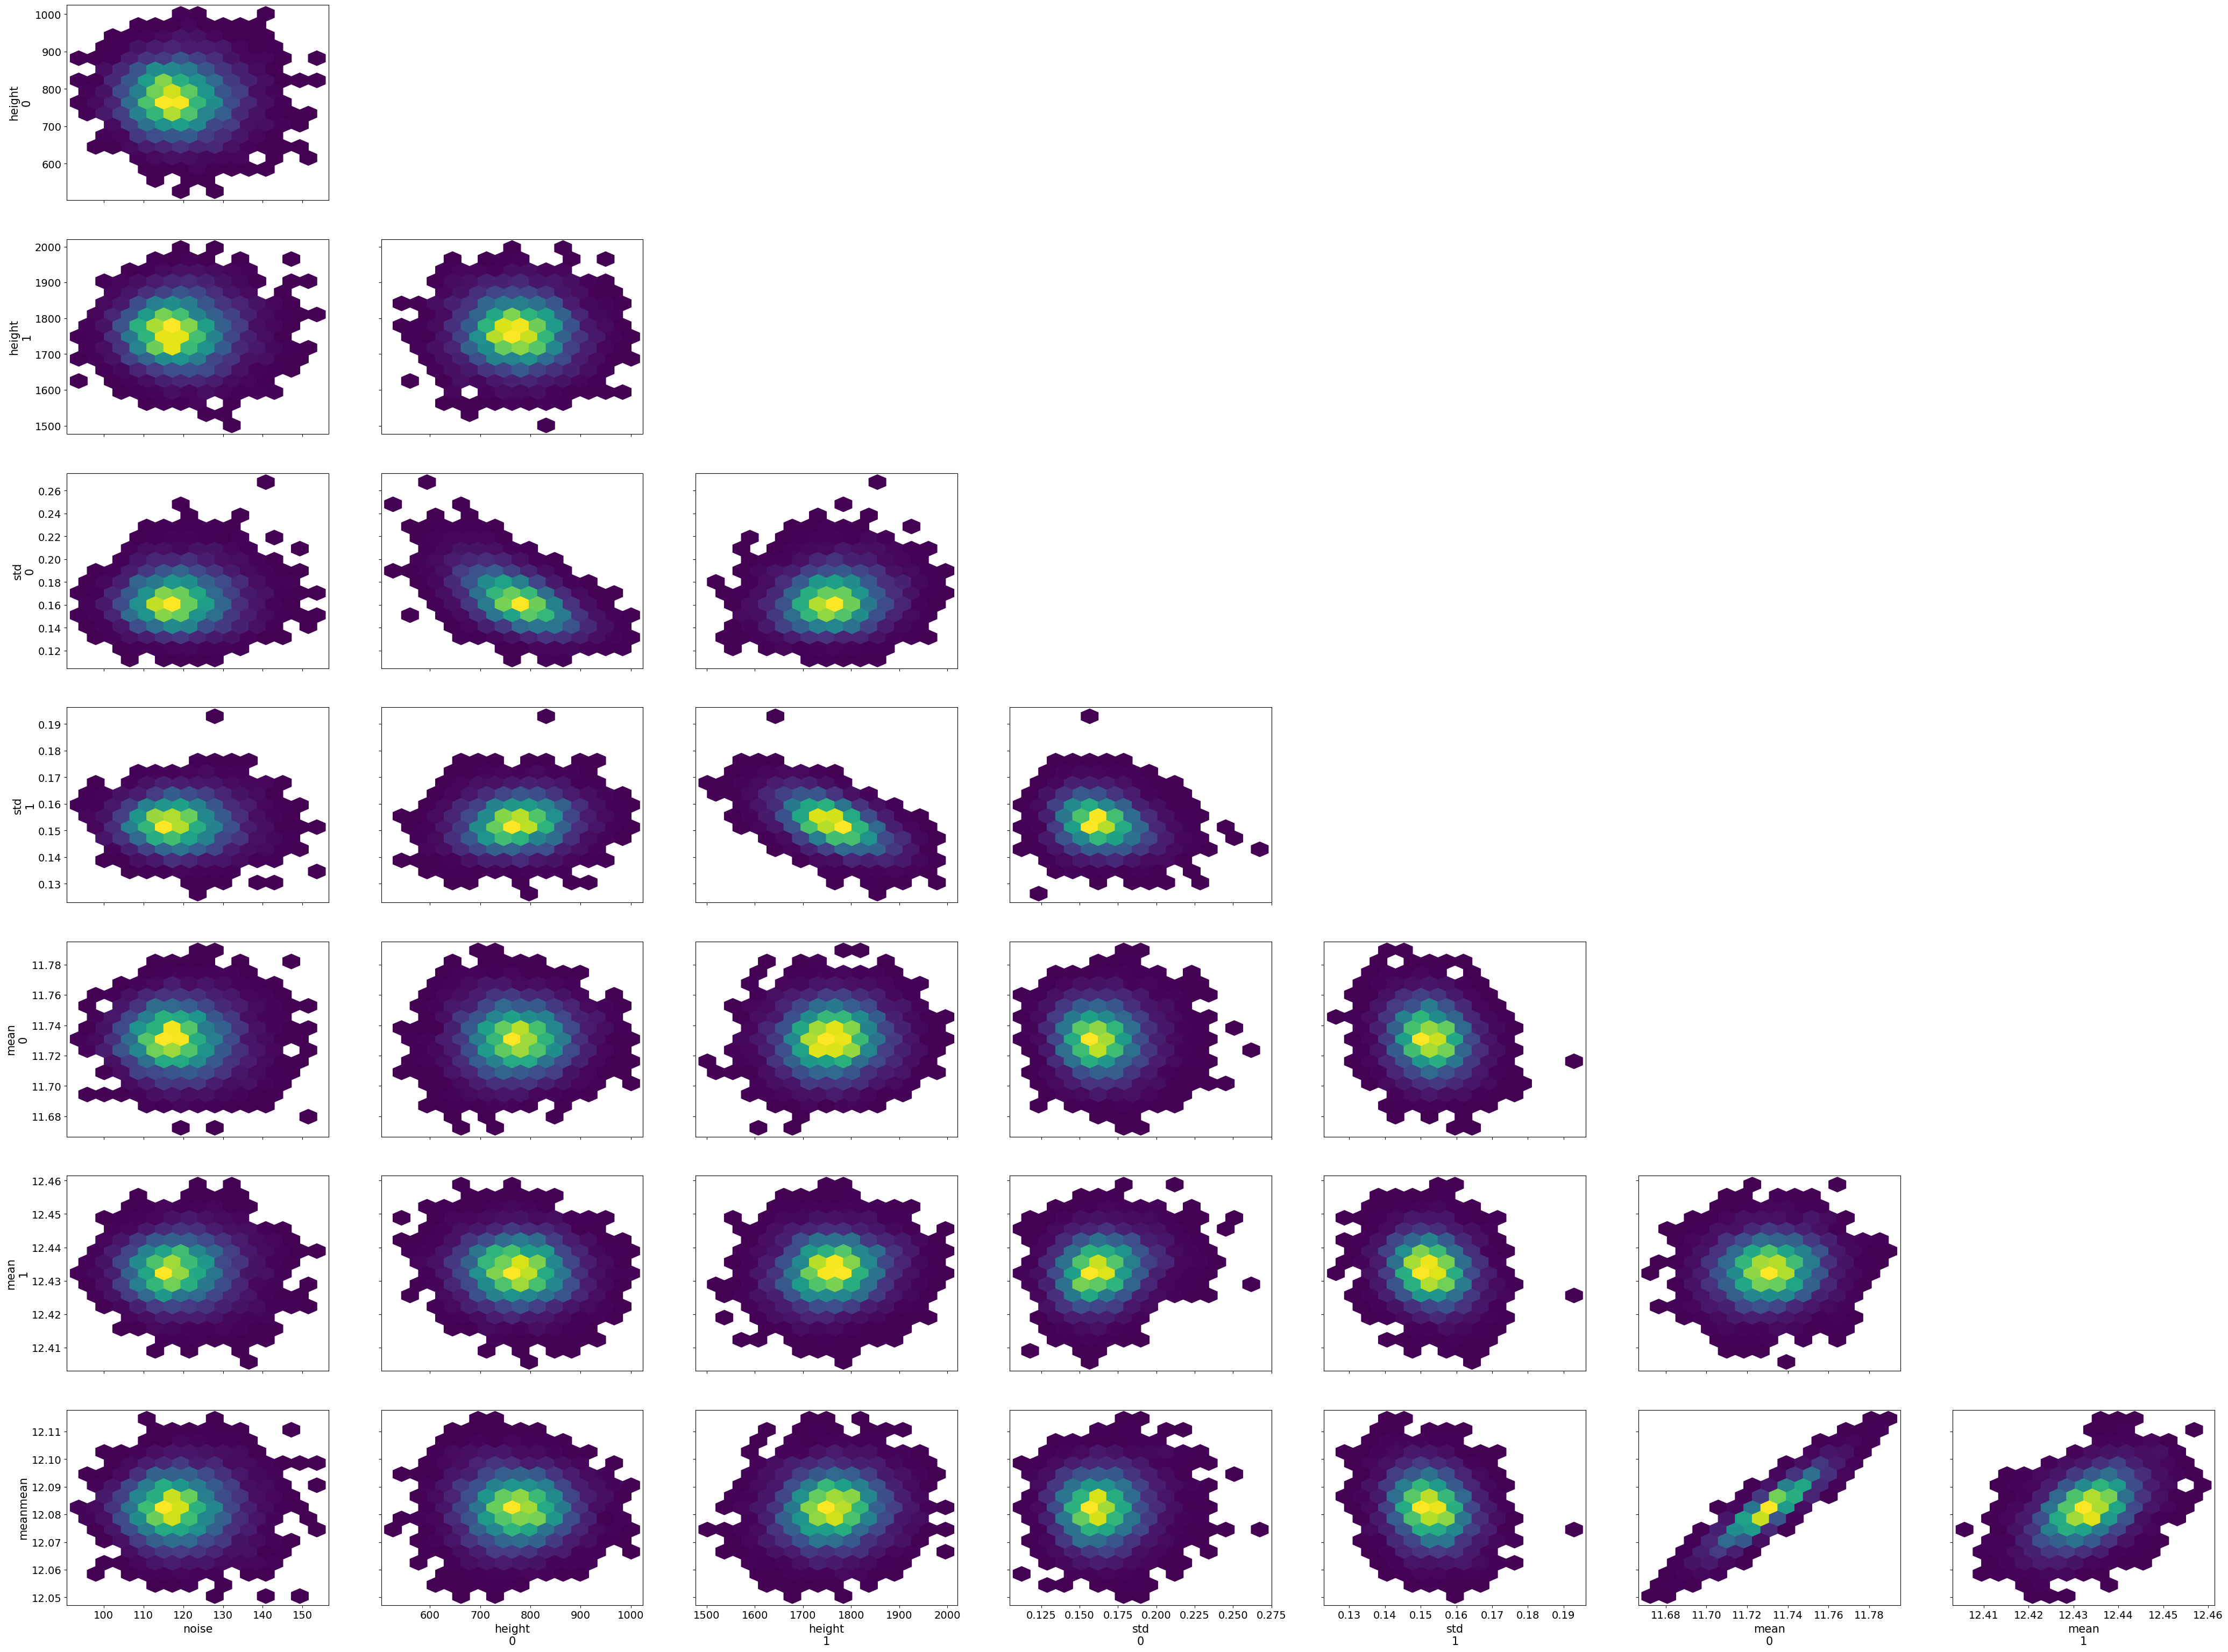

In [9]:
az.plot_pair(idata, var_names="noise,height,std,mean,meanmean".split(","), kind="hexbin");

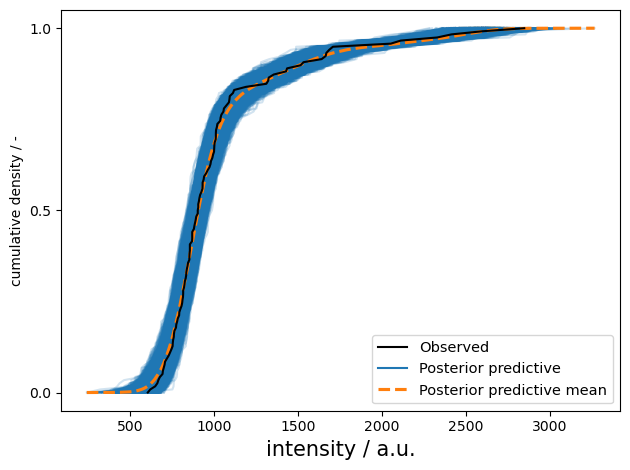

In [10]:
ax = az.plot_ppc(idata, kind="cumulative")
fig = plt.gcf()
ax.set(
    ylabel="cumulative density / -",
    xlabel="intensity / a.u.",
)
plt.tight_layout()

In [11]:
%load_ext watermark
%watermark -idu

Last updated: 2024-05-11T14:18:49.035894+02:00

